Obtain the specific plots for the titration of hydrotelluric acid, $H_2Te$, titrated with NaOH. The following are the
conditions for the titration:

Amount of $H_2Te$ sample: 0.20 M of 100 mL

Titrant: 0.50 M NaOH (you may set the increments)
$\space$

$K_{a1} = 2.30 \times 10^{-3}$

$K_{a2} = 1.60 \times 10^{-11}$

Provide the following plots:

A.) Exact pH titration plot, with x-axis as volume of titrant and y-axis as pH. (10 pts)

B.) alpha plot for each alpha species (alpha for $H_2Te$, $HTe^-$, $Te^{2-}$) The alpha plot may be overlayed with the titration
plot. (10 pts)

C.) Power plot (Z = log [ ]) for the species in the system. (10 pts)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# A) pH Titration Plot (HHE)

In [ ]:
# constants
Ka1 = 2.30*10**(-3)
Ka2 = 1.60*10**(-11)
C_H2Te = 0.20
mol_H2Te = C_H2Te * 100/1000
V_H2Te = 100
C_OH = 0.50
Kw = 10**(-14)

# Volumes
V_e1 = (100*C_H2Te / C_OH)
V_e2 = 2*V_e1
V_OH = np.linspace(0,100,100)
if np.array_equal(V_OH, V_e1):
    V_f = V_H2A + V_e1
elif np.array_equal(V_OH, V_e2):
    V_f = V_H2A + V_e2

In [ ]:
# Volume increments for titration
V_NaOH = np.linspace(0, V_e2 + 20, 500)  # Adding excess titrant beyond Ve2

# Function to calculate pH
def calculate_pH(V_added):
    mol_OH = (V_added / 1000) * C_OH  # Moles of added NaOH
    if V_added < V_e1:
        # Before first equivalence, buffer of H2Te and HTe-
        mol_H2Te_remaining = mol_H2Te - mol_OH
        mol_HTe_formed = mol_OH
        pH = -np.log10(Ka1) + np.log10(mol_HTe_formed / mol_H2Te_remaining)
    elif V_added == V_e1:
        # First equivalence point: HTe- only
        pH = 0.5 * (-np.log10(Ka1) + -np.log10(Ka2))
    elif V_added < V_e2:
        # Between first and second equivalence, buffer of HTe- and Te2-
        mol_HTe_remaining = mol_H2Te - (mol_OH - mol_H2Te)
        mol_Te2_formed = mol_OH - mol_H2Te
        pH = -np.log10(Ka2) + np.log10(mol_Te2_formed / mol_HTe_remaining)
    else:
        # After second equivalence, excess OH-
        mol_excess_OH = mol_OH
        pOH = -np.log10(mol_excess_OH / (V_H2Te + V_added) * 1000)
        pH = 14 - pOH
    return pH

# Calculate pH values for titration curve
pH_values = [calculate_pH(V) for V in V_NaOH]

<ipython-input-3-60c81d0bc68b>:11: RuntimeWarning: divide by zero encountered in log10
  pH = -np.log10(Ka1) + np.log10(mol_HTe_formed / mol_H2Te_remaining)


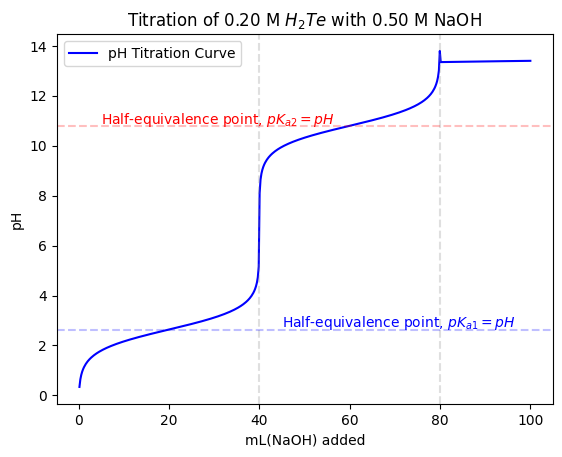

In [ ]:
# plots
pKa1 = -np.log10(Ka1)
pKa2 = -np.log10(Ka2)
plt.plot(V_NaOH, pH_values, label='pH Titration Curve', color='blue')
plt.axvline(x=80, color='gray', linestyle='--', alpha=0.25)
plt.axvline(x=40, color='gray', linestyle='--', alpha=0.25)
plt.axhline(y=pKa1, color='blue', linestyle='--', alpha=0.25)
plt.axhline(y=pKa2, color='red', linestyle='--', alpha=0.25)
plt.ylabel('pH')
plt.xlabel('mL(NaOH) added')
plt.text(45, pKa1+0.1, 'Half-equivalence point, $pK_{a1}=pH$', color='blue')
plt.text(5, pKa2+0.1, 'Half-equivalence point, $pK_{a2}=pH$', color='red')
plt.title('Titration of 0.20 M $H_2Te$ with 0.50 M NaOH')
plt.legend()



# B) Alpha plot for each species

In [ ]:
# Calculate hydrogen ion concentration
pH_values = np.array(pH_values)
C_H = 10**(-pH_values)  # Now (500,)

# Ensure all arrays have the same shape
Ka1 = np.full_like(C_H, Ka1)  # Expand Ka1 to match C_H shape
Ka2 = np.full_like(C_H, Ka2)  # Expand Ka2 to match C_H shape

# Compute denominator with correct shape
den = C_H**2 + C_H * Ka1 + Ka1 * Ka2  # Ensure same shape

# Compute alpha fractions
alpha_H2Te = (C_H**2) / den
alpha_HTe = (Ka1 * C_H) / den
alpha_Te2 = (Ka1 * Ka2) / den


<ipython-input-5-02a5a54ae056>:13: RuntimeWarning: invalid value encountered in divide
  alpha_H2Te = (C_H**2) / den
<ipython-input-5-02a5a54ae056>:14: RuntimeWarning: invalid value encountered in divide
  alpha_HTe = (Ka1 * C_H) / den


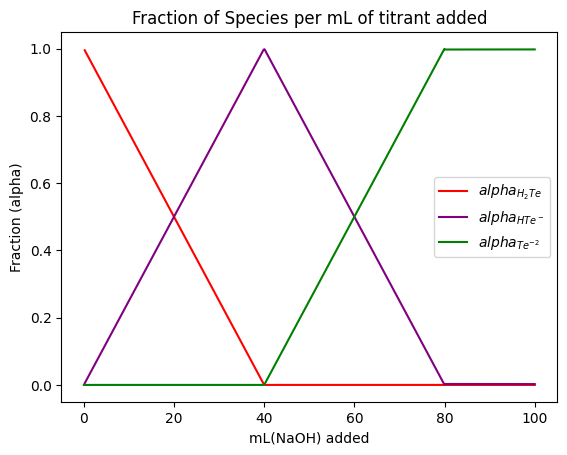

In [ ]:
#plots

plt.plot(V_NaOH,alpha_H2Te, label='$ alpha_{H_2Te} $', color='red')
plt.plot(V_NaOH,alpha_HTe, label='$ alpha_{HTe^-} $', color='purple')
plt.plot(V_NaOH,alpha_Te2, label='$ alpha_{Te^{-2}} $', color='green')
plt.legend()
plt.xlabel('mL(NaOH) added')
plt.ylabel('Fraction (alpha)')
plt.title('Fraction of Species per mL of titrant added')
plt.show()

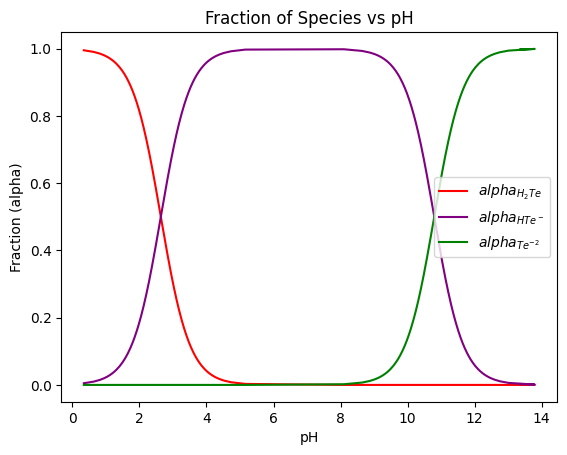

In [ ]:
#plots
#plt.figure(figsize=(8, 5))
plt.plot(pH_values,alpha_H2Te, label='$ alpha_{H_2Te} $', color='red')
plt.plot(pH_values,alpha_HTe, label='$ alpha_{HTe^-} $', color='purple')
plt.plot(pH_values,alpha_Te2, label='$ alpha_{Te^{-2}} $', color='green')
plt.legend(loc = 'right')
plt.xlabel('pH')
plt.ylabel('Fraction (alpha)')
plt.title('Fraction of Species vs pH')
plt.show()


# C) Power Plots

In [ ]:
# conc expressions
C_H2Te = alpha_H2Te * den
C_HTe = alpha_HTe * den
C_Te = alpha_Te2 * den

# z expressions
Z_H2Te = np.log10(C_H2Te)
Z_HTe = np.log10(C_HTe)
Z_Te = np.log10(C_Te)

<ipython-input-8-130d2fd259ab>:4: RuntimeWarning: invalid value encountered in multiply
  C_Te = alpha_Te2 * den


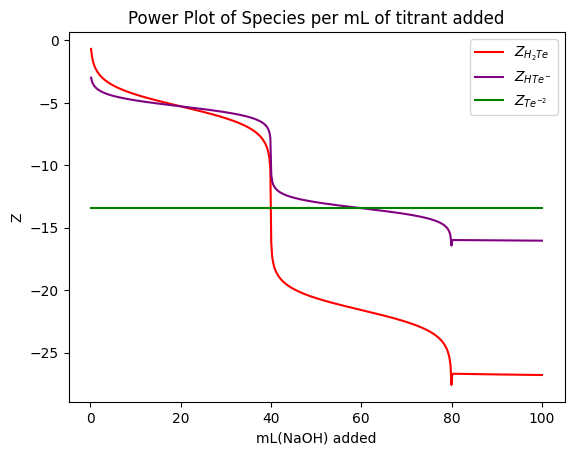

In [ ]:
# plots
plt.plot(V_NaOH,Z_H2Te, label='$ Z_{H_2Te} $', color='red')
plt.plot(V_NaOH,Z_HTe, label='$ Z_{HTe^-} $', color='purple')
plt.plot(V_NaOH,Z_Te, label='$ Z_{Te^{-2}} $', color='green')
plt.legend()
plt.xlabel('mL(NaOH) added')
plt.ylabel('Z')
plt.title('Power Plot of Species per mL of titrant added')
plt.show()

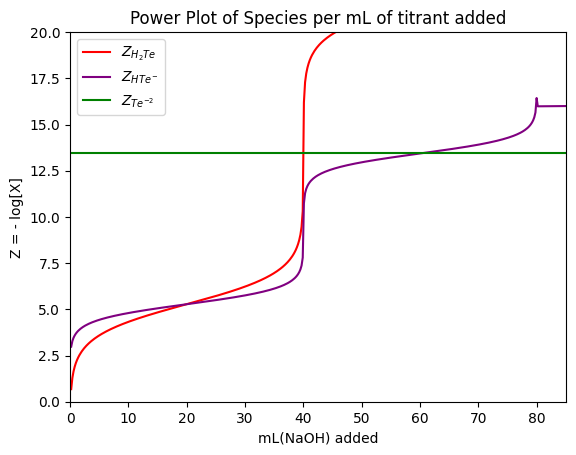

In [ ]:
# z expressions
Z_H2Te = -np.log10(C_H2Te)
Z_HTe = -np.log10(C_HTe)
Z_Te = -np.log10(C_Te)

# plots
plt.plot(V_NaOH,Z_H2Te, label='$ Z_{H_2Te} $', color='red')
plt.plot(V_NaOH,Z_HTe, label='$ Z_{HTe^-} $', color='purple')
plt.plot(V_NaOH,Z_Te, label='$ Z_{Te^{-2}} $', color='green')
plt.xlim(0,85)
plt.ylim(0,20)
plt.legend()
plt.xlabel('mL(NaOH) added')
plt.ylabel('Z = - log[X]')
plt.title('Power Plot of Species per mL of titrant added')
plt.show()

# 1B) 100.0 mL of 0.100 M $H_2SO_3 $ mixed with 50.0 mL of 0.100 M $KOH$

In [ ]:
import numpy as np

# Given values
V_H2C = 100
V_OH = 50
Vf = V_H2C + V_OH
Ka1 = 1.30e-2
Ka2 = 6.20e-8
Kw = 1e-4
C_H2C = ((0.1 * V_H2C) - (V_OH * 0.1)) / Vf  # Initial concentration

print(C_H2C)

# Initial guess for hydrogen ion concentration
C_H = np.sqrt(Ka1 * C_H2C)
print(C_H)
diff = 1  # Initial difference to enter the loop

# Iterative loop until pH converges (difference < 1e-6)
while diff > 1e-:
    den = C_H**2 + C_H * Ka1 + Ka1 * Ka2
    C_H2C = (C_H**3) / den
    C_H_new = np.sqrt(Kw + Ka1 * C_H2C * (1 + (2 * Ka2 / C_H)))
    diff = abs(C_H_new - C_H)  # Compare H+ concentration difference
    C_H = C_H_new

# Compute final pH
pH = -np.log10(C_H)
print(f"Converged pH: {pH:.6f}")


SyntaxError: invalid decimal literal (<ipython-input-11-ef8a279cdd5a>, line 20)

In [ ]:
import numpy as np

# Given values
V_H2C = 100  # Volume of acid
V_OH = 50  # Volume of base added
Vf = V_H2C + V_OH  # Final volume
Ka1 = 1.30 * 10**(-2)
Ka2 = 6.20 * 10**(-8)
Kw = 10**-14  # Water dissociation constant
C_H2C = ((0.1 * 100) - (50 * 0.1)) / Vf  # Concentration of H2C

# Initial estimate for H+ concentration
C_Hi = (Ka1 * C_H2C) ** 0.5

den = C_Hi**2 + C_Hi * Ka1 + Ka1 * Ka2
C_H2C = (C_Hi**3) / den
C_H_new = (Kw + Ka1 * C_H2C * (1 + (2 * Ka2 / C_Hi))) ** 0.5

# Convergence loop
diff = 1

while diff > 1e-6:
    den = C_Hi**2 + C_Hi * Ka1 + Ka1 * Ka2
    C_H2C = (C_Hi**3) / den
    C_H_new = (Kw + Ka1 * C_H2C * (1 + (2 * Ka2 / C_Hi))) ** 0.5

    diff = abs(C_H_new - C_Hi)  # Compare new and old C_H
    C_Hi = C_H_new  # Update for next iteration

# Calculate pH after convergence
pH_final = -np.log10(C_H_new)
print(f"Converged pH: {pH_final:.6f}")
